In [2]:
import pandas as pd 
from sklearn.metrics import classification_report,roc_auc_score, roc_curve

data = pd.read_csv('uci_malware_detection.csv')
data = data.dropna()
data = data.drop_duplicates()
data

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,malicious,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [3]:
x = data.drop(["Label"],axis=1)
y = data['Label'].values

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [5]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [7]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(None,1)))

model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.2))

model.add(LSTM(64))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, None, 64)          256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                      

In [29]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test) )

Epoch 1/50
3/3 [==============================] - 4s 728ms/step - loss: 0.7180 - accuracy: 0.3581 - val_loss: 0.6295 - val_accuracy: 0.8000
Epoch 2/50
3/3 [==============================] - 1s 261ms/step - loss: 0.6059 - accuracy: 0.8108 - val_loss: 0.5305 - val_accuracy: 0.8000
Epoch 3/50
3/3 [==============================] - 1s 273ms/step - loss: 0.5138 - accuracy: 0.8142 - val_loss: 0.4620 - val_accuracy: 0.8000
Epoch 4/50
3/3 [==============================] - 1s 271ms/step - loss: 0.4481 - accuracy: 0.8142 - val_loss: 0.4365 - val_accuracy: 0.8000
Epoch 5/50
3/3 [==============================] - 1s 278ms/step - loss: 0.4196 - accuracy: 0.8142 - val_loss: 0.4189 - val_accuracy: 0.8000
Epoch 6/50
3/3 [==============================] - 1s 272ms/step - loss: 0.4023 - accuracy: 0.8142 - val_loss: 0.3799 - val_accuracy: 0.8000
Epoch 7/50
3/3 [==============================] - 1s 280ms/step - loss: 0.3677 - accuracy: 0.8142 - val_loss: 0.3425 - val_accuracy: 0.8000
Epoch 8/50
3/3 [====

In [30]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model Loss: {loss}\nModel Accuracy: {accuracy*100}")

3/3 [==============================] - 0s 33ms/step - loss: 0.0563 - accuracy: 0.9867
Model Loss: 0.0562986359000206
Model Accuracy: 98.66666793823242


Text(0, 0.5, 'Loss')

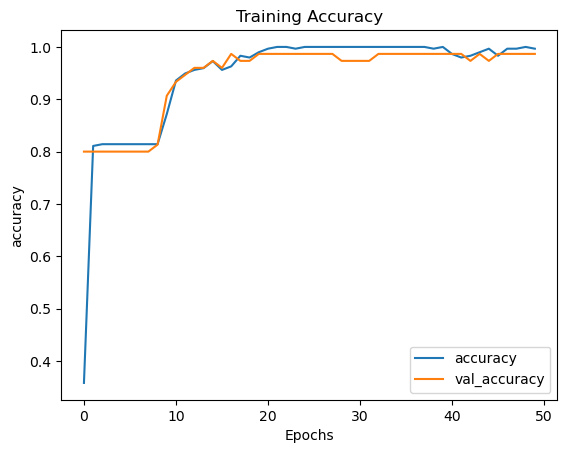

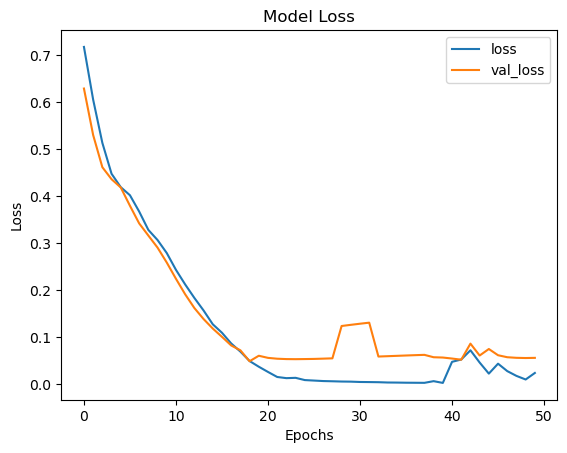

In [31]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [32]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

3/3 [==============================] - 1s 34ms/step


In [33]:
# classification report
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        15

    accuracy                           0.99        75
   macro avg       0.97      0.99      0.98        75
weighted avg       0.99      0.99      0.99        75



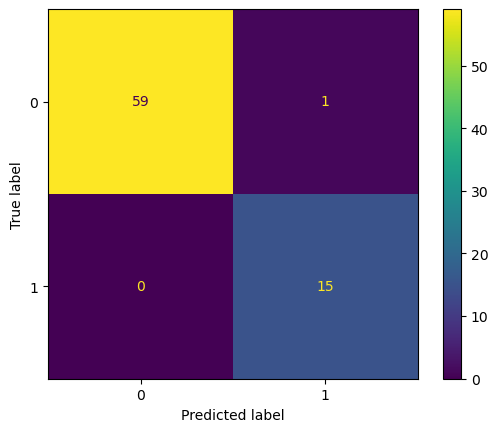

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# plot the confusion matrix
cm_display.plot()
plt.show()

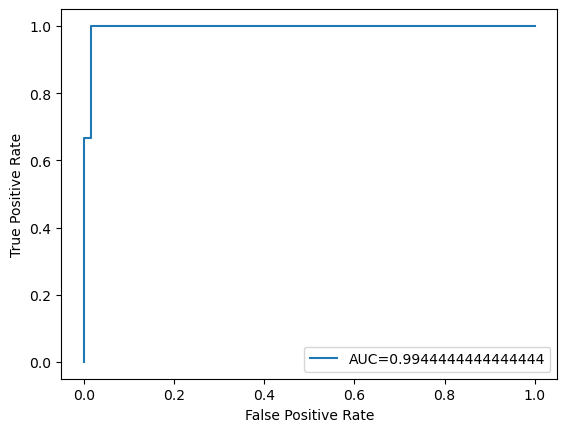

In [35]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [36]:
model.save("cnn-lstm_malware_detection.h5")